In [ ]:
# Visualisation of 

In [53]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [37]:
# wrangle function for loading data
def wrangle(filepath):
    df = pd.read_csv(filepath)

    return df


In [38]:
df = wrangle(r"C:\Users\User\Desktop\compiler\Personality\train.csv")

In [39]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


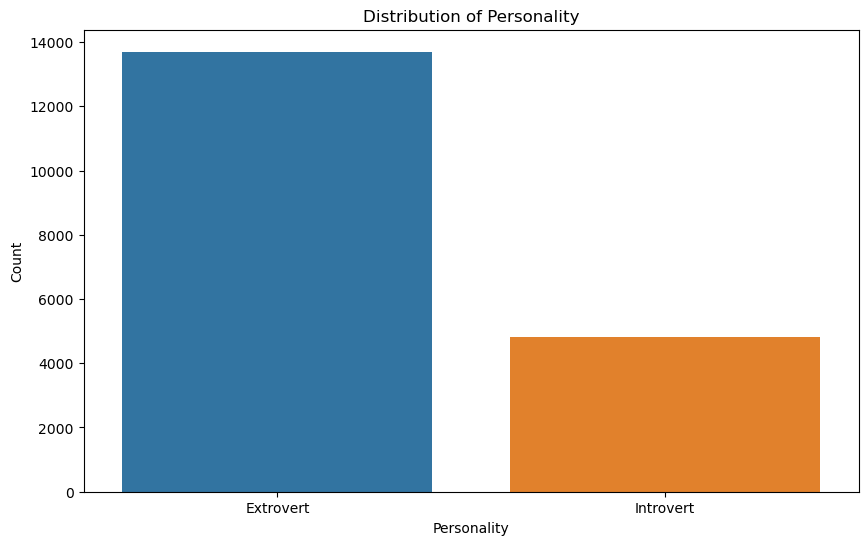

''

In [40]:
# Count plot to show balance
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = "Personality", hue = "Personality")
# Label Axis
plt.xlabel("Personality")
plt.ylabel("Count")

# Add a Title
plt.title("Distribution of Personality")
plt.show()
;

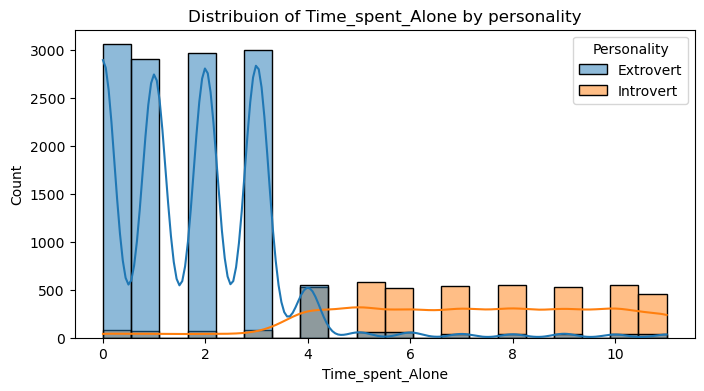

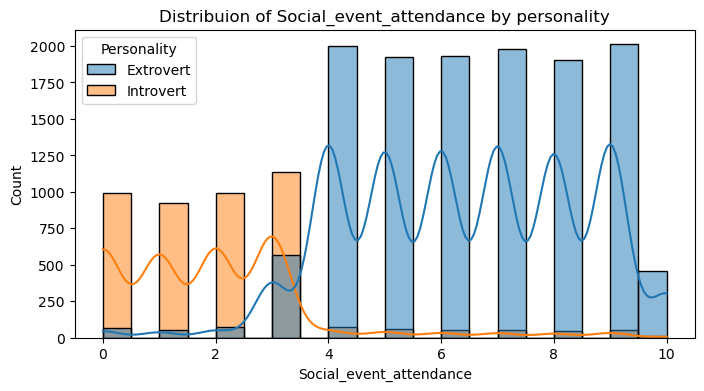

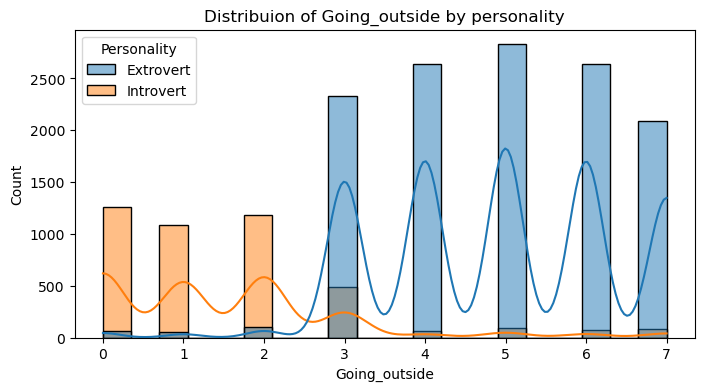

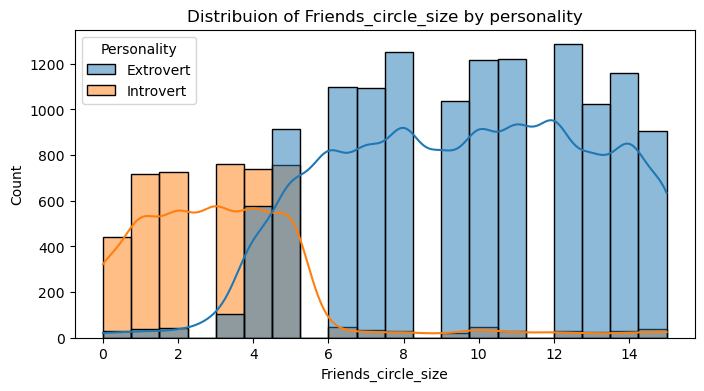

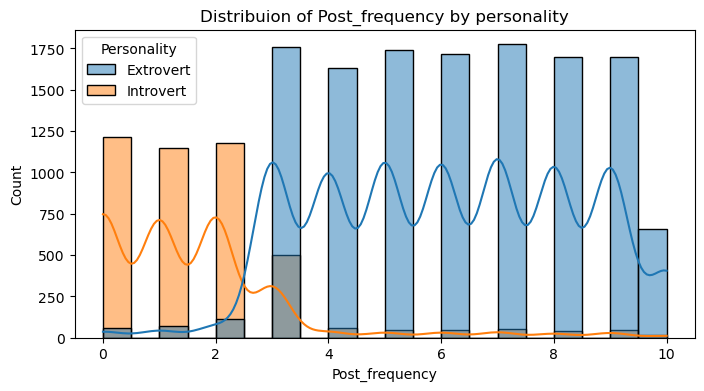

In [41]:
# Histogram plot of the Numerical features
numerical_cols = ["Time_spent_Alone", "Social_event_attendance", "Going_outside","Friends_circle_size",	"Post_frequency"]

for col in numerical_cols:
    plt.figure(figsize= (8, 4))
    sns.histplot(data = df, x = col, bins = 20, hue = "Personality", kde = True)
    # Add a title
    plt.title(f"Distribuion of {col} by personality")
    plt.show()
    ;

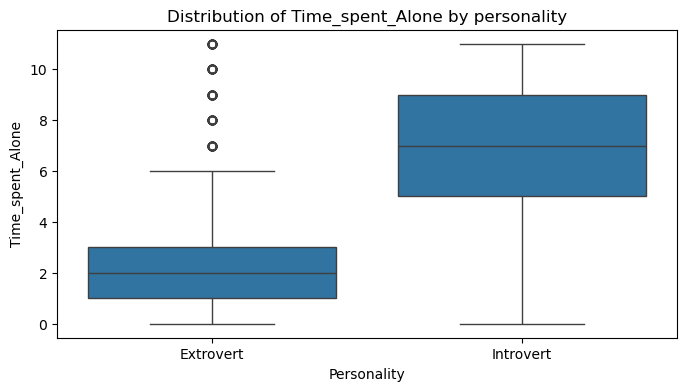

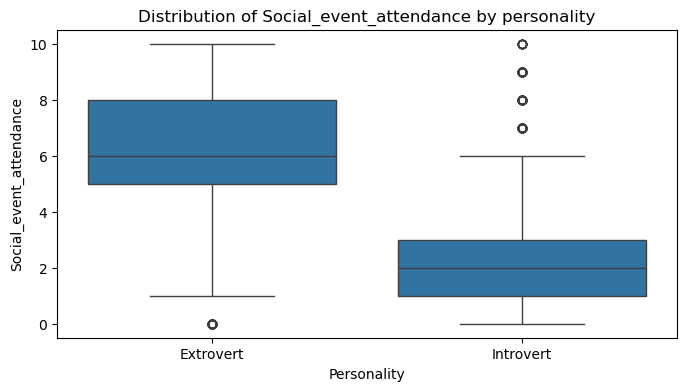

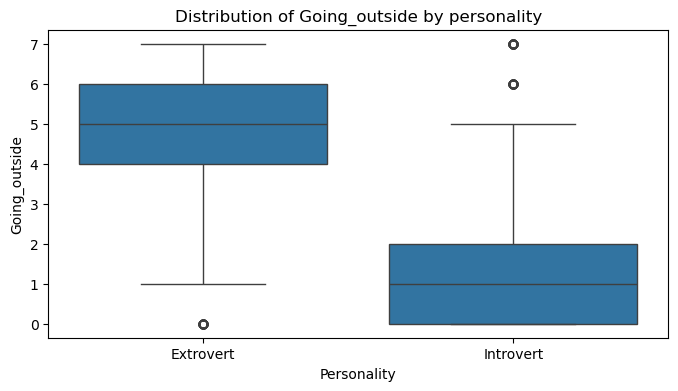

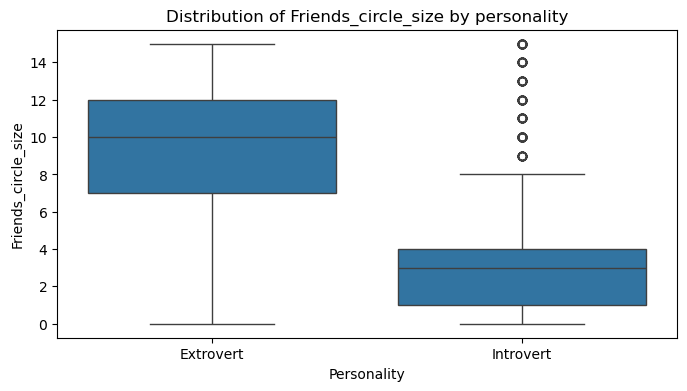

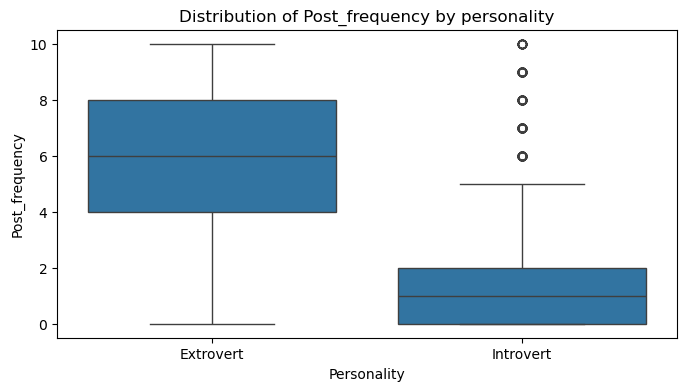

In [42]:
# Box plot to investigate outliers
for col in numerical_cols:
    plt.figure(figsize = (8,4))
    sns.boxplot(data = df, x= "Personality", y = col)
    # Add a title
    plt.title(f"Distribution of {col} by personality")
    plt.show();

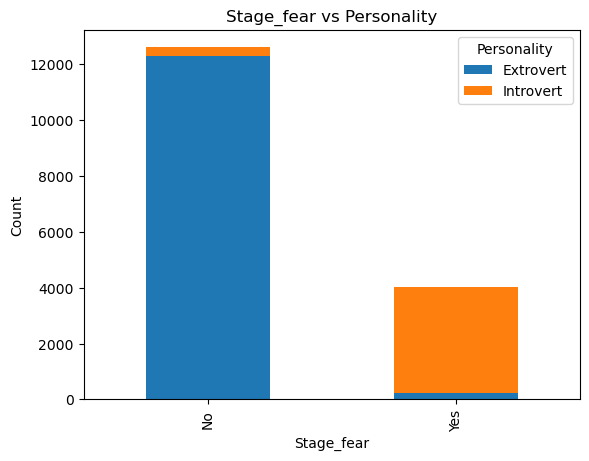

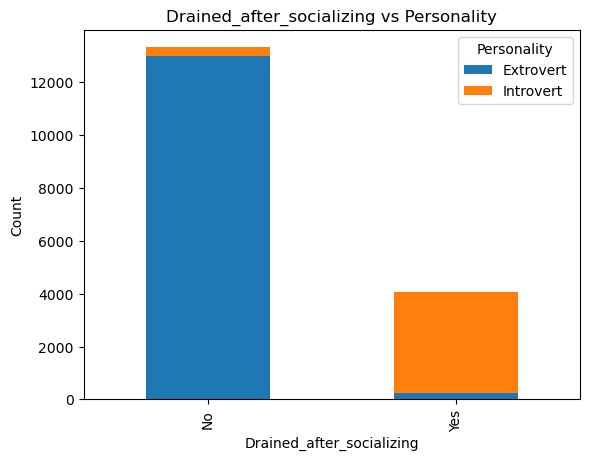

In [45]:
# Bar plot for categorical variables
cat_cols = ["Stage_fear", "Drained_after_socializing"]

for col in cat_cols:
    crstb = pd.crosstab(df[col], df["Personality"])
    crstb.plot(kind = "bar", stacked = True)
    # Add Axis
    plt.ylabel("Count")
    # Add a title
    plt.title(f"{col} vs Personality")
    plt.show();

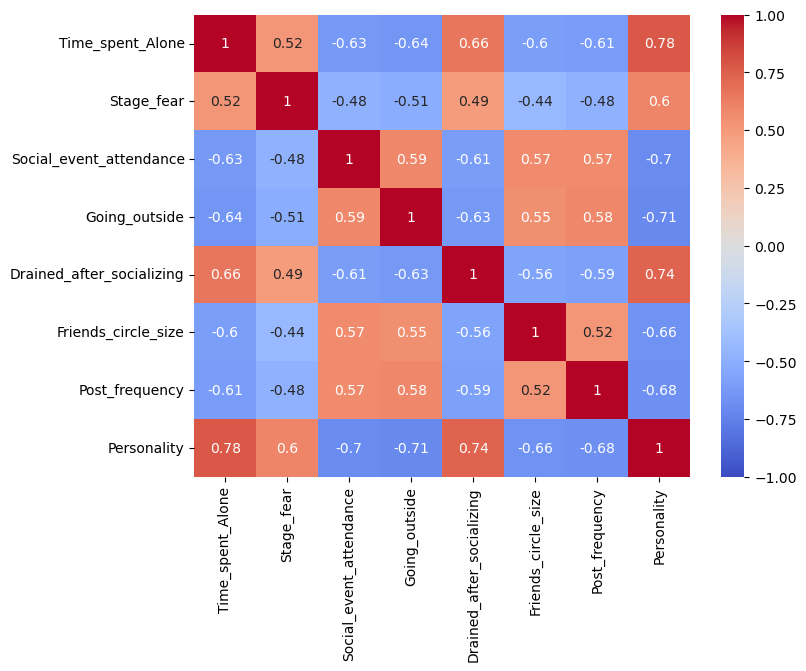

In [55]:
# To visualize relationship between features and target through a heatmap
features = ["Time_spent_Alone",	"Stage_fear", "Social_event_attendance", "Going_outside", "Drained_after_socializing", "Friends_circle_size", "Post_frequency","Personality"]
corr_data = df[features].copy()

# To create instances of label encoder for each categorical feature
label_fear = LabelEncoder() 
label_social = LabelEncoder()
label_per = LabelEncoder()

# Encode categorical data using label encoder
corr_data["Stage_fear"] = label_fear.fit_transform(corr_data["Stage_fear"])
corr_data["Drained_after_socializing"] = label_social.fit_transform(corr_data["Drained_after_socializing"])
corr_data["Personality"] = label_per.fit_transform(corr_data["Personality"])

# To generate correlation matrix
corr = corr_data.corr()

# Heatmap plot
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, vmin=-1, vmax= 1, center = 0, cmap='coolwarm');

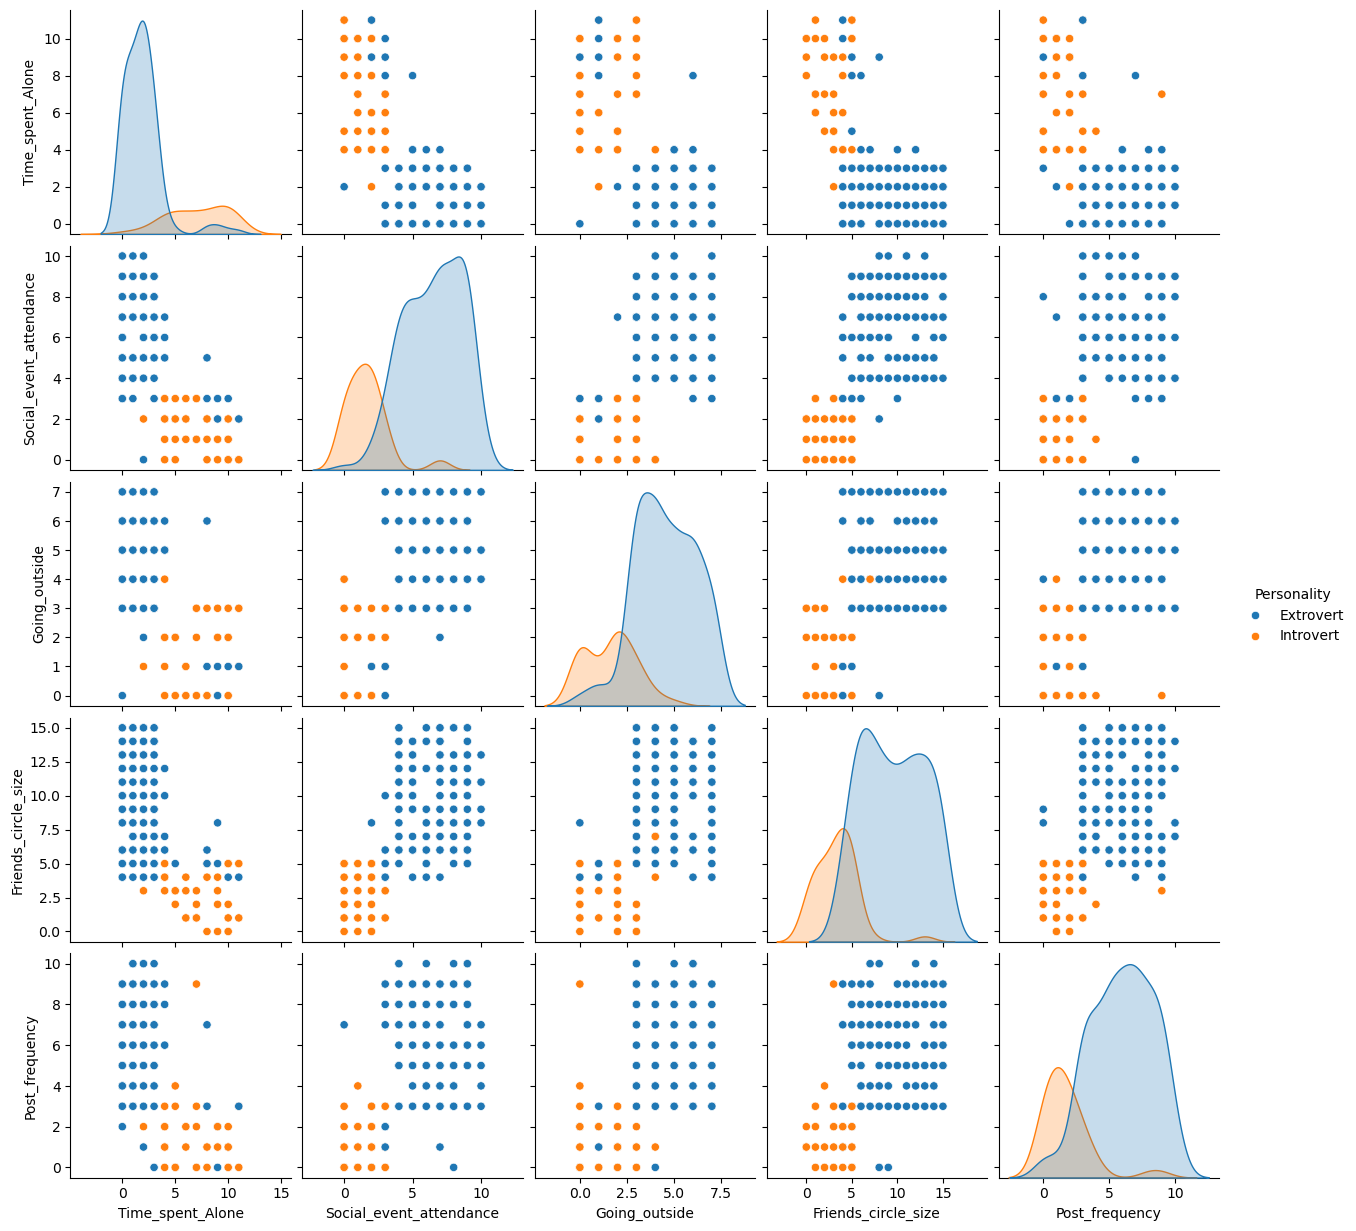

In [57]:
#sample to speed up if dataset is large
sample_df = df[numerical_cols + ['Personality']].dropna().sample(200)

sns.pairplot(sample_df, hue='Personality', diag_kind='kde')
plt.show()